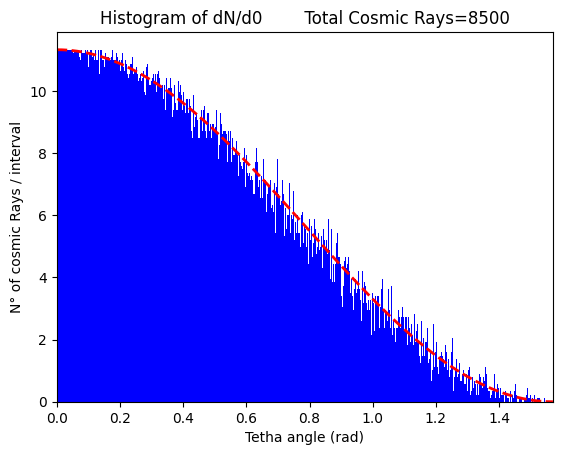

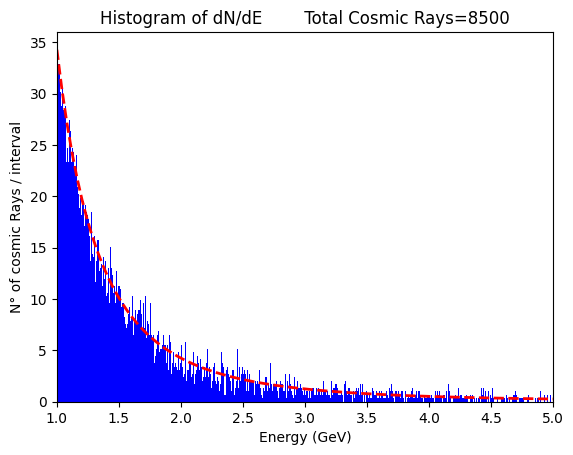

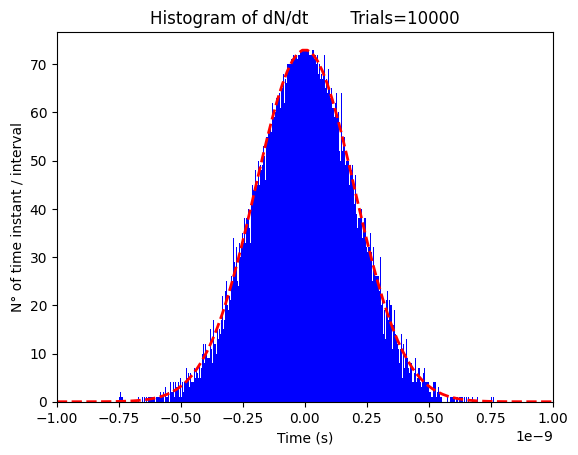

N° of cosmic rays passing through both detectors: 58 of 8500 in total


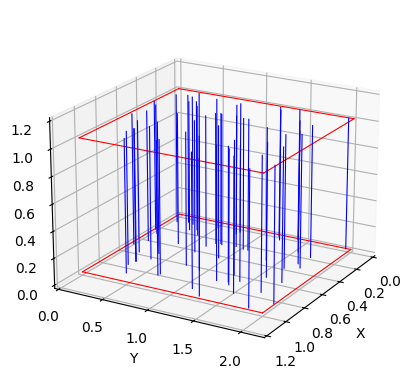

                                        Initial point  \
0   [0.8169661399225223, 0.6909477738071104, 4.875...   
1   [0.26420833568936075, 0.0050883758697941595, 6...   
2   [0.45659892653922896, 0.6865140536383398, 4.59...   
3   [0.6909843482800007, 1.4419998760963462, 3.849...   
4   [0.2858292207336195, 0.8053910585576065, 5.802...   
5   [0.36360410895989403, 0.7034295859059894, 6.84...   
6   [0.16576812210437275, 0.37980917904045697, 6.6...   
7   [0.2942619362879988, 0.7407587146191732, 5.043...   
8   [0.2943230434254964, 1.0606252349792724, 3.458...   
9   [0.07249377503825194, 1.2575704365517884, 4.42...   
10  [0.2871157989331081, 1.1235071901127127, 4.269...   
11  [0.3234115848329946, 0.09508076299552881, 6.18...   
12  [0.23493906298596023, 0.46358326009249406, 6.9...   
13  [0.09851289468206836, 0.2632409340575572, 4.41...   
14  [0.7374714036071204, 0.31020821419242584, 4.94...   
15  [0.7829620997545028, 0.2899634821142052, 5.153...   
16  [0.36719708216169344, 1.782

In [3]:
#Cosmic Rays Simulation
import Detectorslib
import LinesLib
import Thetadistribution
import EnergyDistribution
import GaussianDistLib
import Libsensors
import ReconstructionLib
import PlotLib
import pandas as pd

N=8500; R_theta=1500; R_energy=2000; E_max=5

#Create Thetha and Energy distribution =====
zones_theta=Thetadistribution.distribtheta(N,R_theta)
zones_energy=EnergyDistribution.distribenergy(N,R_energy,E_max)
zones_rounded_theta=Thetadistribution.round_zones(zones_theta,N,R_theta)
zones_rounded_energy=EnergyDistribution.round_zones(zones_energy,N,R_energy)
Thetadistribution.theta_plot(N,zones_theta,R_theta)
EnergyDistribution.energy_plot(N,zones_energy,R_energy,E_max)

#Time distribution (Time resolution) =====
GaussianDistLib.show_example(0,10000,550,"ON")

#Create detectors =====
detector_bottom=Detectorslib.detector("Bottom - Detector",[0.5,1.,0.],1.,2.,[],[])
detector_top=Detectorslib.detector("Top - Detector",[0.5,1.,1.],1.,2.,[],[])
detector_bottom.corners(); detector_top.corners()
detector_bottom.edges(); detector_top.edges()
detectors=[detector_bottom,detector_top]

#Create lines =====
line_array=LinesLib.createline_array(N,R_theta,R_energy,zones_rounded_theta,zones_rounded_energy,E_max)

#Selecting lines passing through detectors =====
new_line_array,intersections_array=Detectorslib.array_cosmic_rays(line_array,detectors)

#Calculating the intersection time on each plane =====
time_detectors,time_flight=Detectorslib.time_array(detectors,new_line_array)

#Applyig the time  resolution to intersection times on each detector =====
new_time_detectors=[]
for i in range(len(time_detectors)):
    new_time_detectors.append(GaussianDistLib.transform_times(time_detectors[i]))

#for i in range(len(time_detectors[0])):
#    print("Old",time_detectors[0][i])
#    print("New",new_time_detectors[0][i])

#Create sensors =====
sensors_bottom=Libsensors.sensors([],detector_bottom.lenx,detector_bottom.leny,0.05,0.05)
sensors_top=Libsensors.sensors([],detector_top.lenx,detector_top.leny,0.05,0.05)
sensor_bottom_array=sensors_bottom.create_sensors()
sensor_top_array=sensors_top.create_sensors()
sensors_array=[sensors_bottom,sensors_top]
transformed_intersections_array=Libsensors.transform_intersections(intersections_array,sensors_array)

#Reconstructing Lines =====
reconstructed_line_array=ReconstructionLib.reconstructed_line_array(transformed_intersections_array,new_time_detectors)

#Plotting Detectors & Cosmics Rays =====
PlotLib.plot_cosmic_rays(N,detectors,new_line_array,time_detectors,0,1.2,20,30)
#PlotLib.plot_cosmic_rays(N,detectors,reconstructed_line_array,new_time_detectors,0,1.2,20,30)

#Creating Data Frame & CSV

data_frame_list= [
]

def create_data_frame(data_frame,new_line_array,intersections_array,time_detectors,time_flight):
    for i in range(len(new_line_array)):
        data_frame.append([])
        data_frame[i].append(new_line_array[i].inipoint)
        data_frame[i].append(new_line_array[i].direction_vect)
        data_frame[i].append(new_line_array[i].fi)
        data_frame[i].append(new_line_array[i].theta)
        data_frame[i].append(new_line_array[i].muon_energy)
        data_frame[i].append(intersections_array[0][i])
        data_frame[i].append(intersections_array[1][i])
        data_frame[i].append(time_detectors[0][i])
        data_frame[i].append(time_detectors[1][i])
        data_frame[i].append(time_flight[i])
    return data_frame

create_data_frame(data_frame_list,new_line_array,intersections_array,time_detectors,time_flight)
columnas=["Initial point","Direction vector","Fi","Theta","Muon Energy","Bottom Inter.","Top Inter.","Time B","Time T","Flight Time"]
df=pd.DataFrame(data_frame_list, columns = columnas)
print(df)
ruta='C:/Users/Martin/Desktop/testing.csv'
df.to_csv(ruta, index=False)
